In [2]:
import pandas as pd
import numpy as np

#Importing the data and checking the list of variables and rows
train=pd.read_csv("train_hp.csv", encoding="Latin-1")
test=pd.read_csv("test_hp.csv", encoding="Latin-1")
sample_submission=pd.read_csv("hp_sample_submission.csv", encoding="Latin-1")

print(train.info())
print(test.info())

print(train.shape)
print(test.shape)
print(sample_submission.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
#Installing PyCaret
!pip install pycaret

In [3]:
#Predicing the house price is a regression problem
#Importing regression from PyCaret to build several regression models

from pycaret import regression
from pycaret.regression import *

In [4]:
#Setting up the PyCaret with several parameters
#numeric_imputation= mean (Mean value is used to impute the missing values for numeric variables)
#ignore_features= [var] (Forcing the algorithm to remove these features while training the model)
#normalization= True (is a technique often applied as part of data preparation for machine learning. The goal of normalization is to rescale the values of numeric columns in the dataset without distorting differences in the ranges of values or losing information.)
#transformation= True (Transformation is a more radical technique. Transformation changes the shape of the distribution such that the transformed data can be represented by a normal or approximate normal distribution)
#transform_target= True (This is similar to transformation, but applied to target variable)
#feature_interaction= True (It is often seen in machine learning experiments when two features combined through an arithmetic operation becomes more significant in explaining variances in the data, than the same two features separately)
#feature_selection= True (Feature Importance is a process used to select features in the dataset that contributes the most in predicting the target variable. Working with selected features instead of all the features reduces the risk of over-fitting, improves accuracy, and decreases the training time. In PyCaret, this can be achieved using feature_selection parameter)
#remove_multicollinearity=True (Multicollinearity (also called collinearity) is a phenomenon in which one feature variable in the dataset is highly linearly correlated with another feature variable in the same dataset. Multicollinearity increases the variance of the coefficients, thus making them unstable and noisy for linear models. One such way to deal with Multicollinearity is to drop one of the two features that are highly correlated with each other. This can be achieved in PyCaret using remove_multicollinearity parameter within setup)
#multicollinearity_threshold (Threshold used for dropping the correlated features. Only comes into effect when remove_multicollinearity is set to True)
#ignore_low_variance= True (Sometimes a dataset may have a categorical feature with multiple levels, where distribution of such levels are skewed and one level may dominate over other levels. This means there is not much variation in the information provided by such feature. Such features are eliminated when this is set as True)

reg = setup(data = train, 
             target = 'SalePrice',
             numeric_imputation = 'mean',
             categorical_features = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']  , 
             ignore_features = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
             normalize = True,
             transformation= True,
             transform_target= True,
             feature_interaction= True,
             feature_selection= True,
             remove_multicollinearity=True,
             multicollinearity_threshold=0.6,
             ignore_low_variance= True,
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,371
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,58
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
#This step compares all the Regression Models available with in PyCaret
#Best model against every Regression model comparison statistics is highlighted 
compare_models()

#Best model is Catboost Regressor when we compare models against RMSE (Root Mean Squared Error)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,15231.393800,795245207.685800,26659.734200,0.886800,0.126200,0.088100
1,Extreme Gradient Boosting,17514.543200,880581857.563600,28960.843200,0.868000,0.142000,0.101300
2,Gradient Boosting Regressor,17429.269000,882218880.117200,28963.013100,0.867400,0.143400,0.101600
3,Extra Trees Regressor,17953.002800,874537388.316100,28932.553400,0.867000,0.141900,0.102000
4,Light Gradient Boosting Machine,17673.422100,942710095.856000,29764.791300,0.859800,0.147700,0.103400
5,Random Forest,19213.899000,967274627.625700,30546.854000,0.852000,0.153800,0.110100
6,Bayesian Ridge,15201.220400,1301646700.805500,28630.750500,0.829400,0.124900,0.090100
7,Support Vector Machine,18627.731700,1323918515.205100,34257.928700,0.812200,0.153700,0.104400
8,K Neighbors Regressor,21664.217900,1366489000.083300,36005.199800,0.793100,0.170900,0.123000
9,AdaBoost Regressor,25437.452400,1501925297.058400,38369.126100,0.763800,0.185800,0.140600


In [6]:
#Creating the catboost model as it was the best among all the models when compared against RMSE
catboost  = create_model('catboost') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16556.7164,1.585107e+09,39813.3991,0.8190,0.1324,0.0841
1,15708.7211,6.288615e+08,25077.1108,0.8848,0.1118,0.0822
2,11701.2057,2.511652e+08,15848.1920,0.9376,0.1081,0.0784
3,15837.1146,7.764220e+08,27864.3508,0.8844,0.1273,0.0882
4,14852.3698,6.011265e+08,24517.8820,0.9144,0.1149,0.0854
5,17816.4347,1.920168e+09,43819.7250,0.7750,0.1952,0.1228
6,19401.5530,1.081522e+09,32886.5017,0.8798,0.1362,0.1004
7,13349.8795,4.470703e+08,21144.0365,0.9046,0.1141,0.0748
8,15686.5843,4.599371e+08,21446.1444,0.9070,0.1167,0.0863
9,11403.3585,2.010724e+08,14179.9996,0.9618,0.1054,0.0788


In [7]:
#Hyperparamter Optimization
#Tuning the hyper paramters of the catboost model built above
tuned_cb = tune_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16375.1195,8.836976e+08,29727.0516,0.8991,0.1210,0.0865
1,17452.5416,8.250871e+08,28724.3290,0.8488,0.1220,0.0879
2,12245.6921,2.714532e+08,16475.8371,0.9326,0.1154,0.0839
3,17085.0663,1.050165e+09,32406.2544,0.8437,0.1364,0.0906
4,14934.3639,5.307974e+08,23039.0405,0.9244,0.1130,0.0837
5,17342.7493,1.518352e+09,38966.0321,0.8221,0.1965,0.1250
6,20231.0259,1.232456e+09,35106.3491,0.8630,0.1398,0.1004
7,14171.1162,4.980045e+08,22316.0137,0.8938,0.1176,0.0811
8,14859.5334,4.568956e+08,21375.1154,0.9076,0.1193,0.0837
9,11982.9430,2.153105e+08,14673.4615,0.9591,0.1026,0.0794


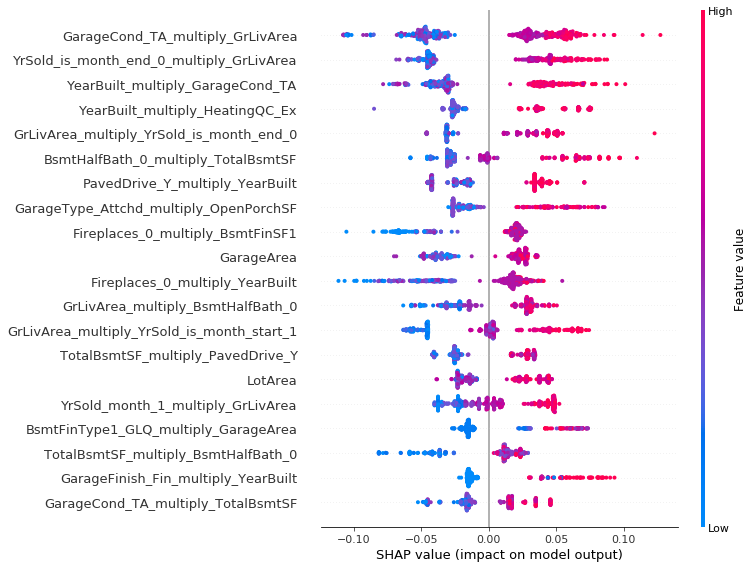

In [8]:
#Inpreting the significant featurs of the model
#Looking at the features, it looks like most significant features are the ones that are formed using feature interaction (where multiple features are combined to form a single feature)

interpret_model(tuned_cb)

In [10]:
#Predicting the model on unseen data for submission to Kaggle
#This model has a score of 0.14486 when submitted in Kaggle

predictions = predict_model(tuned_cb, data = test)
sample_submission['SalePrice'] = predictions['Label']
sample_submission.to_csv('submission_house_price_pycaret.csv',index=False)
sample_submission.head()

,Id,SalePrice
0,1461,133771.5096
1,1462,160968.0533
2,1463,198534.2972
3,1464,210454.5722
4,1465,183709.9214


In [13]:
#Finalizing the model
#The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production

final_catboost = finalize_model(tuned_cb)

#Final Tuned Catboost Regression parameters for deployment
print(final_catboost)

In [14]:
#save_model() allows you to save the model along with entire transformation pipeline for later use.
save_model(final_catboost,'Final CatBoost Model 27Jul2020')

Transformation Pipeline and Model Succesfully Saved


In [15]:
#Loading the saved model
saved_final_catboost = load_model('Final CatBoost Model 27Jul2020')

Transformation Pipeline and Model Sucessfully Loaded
